In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [4]:
df.shape

(6991, 41)

# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values
target = df["koi_disposition"]
data = df.drop("koi_disposition", axis =1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


[0.13245411 0.15965903 0.1279188  0.05259034 0.01824019 0.01373552
 0.01485199 0.01339292 0.02449287 0.02178885 0.01178508 0.01219677
 0.00984102 0.01737844 0.02670847 0.03011287 0.02536075 0.01232658
 0.01302665 0.01462499 0.01181275 0.01041418 0.01542993 0.00895813
 0.00963057 0.00880378 0.02874748 0.00964565 0.00953593 0.02203175
 0.01630348 0.01066954 0.01036339 0.01476934 0.0086666  0.01159119
 0.00903585 0.01113196 0.00987407 0.01009821]


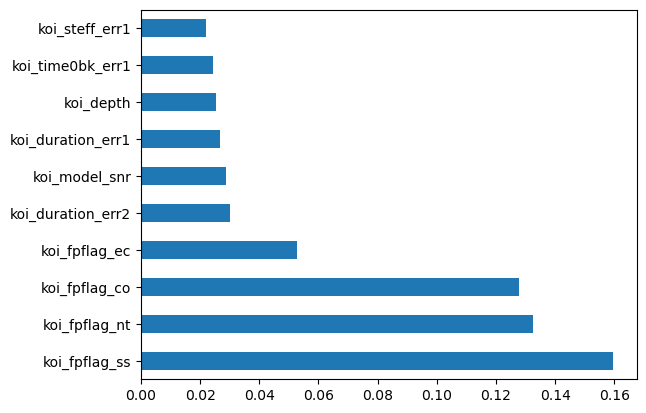

In [6]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(data, target)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind= "barh")
plt.savefig("images/features.jpg")
plt.show()

In [7]:
# Selected top 10 important features
selected_features = data[['koi_fpflag_ss','koi_fpflag_nt','koi_fpflag_co','koi_fpflag_ec',
                         'koi_model_snr','koi_duration_err1','koi_duration_err2','koi_steff_err1',
                        'koi_time0bk_err1','koi_time0bk_err2']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_left, y_train, y_left = train_test_split(selected_features, target, train_size=.2)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.2)

In [9]:
X_train.shape, X_val.shape, X_test.shape

((1398, 10), (1118, 10), (4475, 10))

In [10]:
model.score(X_train, y_train),model.score(X_val, y_val)

ValueError: Number of features of the model must match the input. Model n_features is 40 and input n_features is 10 

In [11]:
model.score(X_test, y_test)

ValueError: Number of features of the model must match the input. Model n_features is 40 and input n_features is 10 

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scale = MinMaxScaler().fit(X_train)

X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

# Train the Model

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train_scaled, y_train)

In [15]:
print(f"Training Data Score: {model_rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8712849162011174


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
from pprint import pprint
print('Parameters:\n')
pprint(model_rf.get_params())

Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [17]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [ 100, 200, 300],
              'max_depth': [50,100,150]}
grid = GridSearchCV(model_rf, param_grid, verbose=3 )


In [18]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=50, n_estimators=100, score=0.846, total=   0.2s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.886, total=   0.2s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.900, total=   0.2s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] ...... max_depth=50, n_estimators=100, score=0.867, total=   0.2s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] ...... max_depth=50, n_estimators=100, score=0.842, total=   0.2s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] ...... max_depth=50, n_estimators=200, score=0.854, total=   0.4s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] ...... max_depth=50, n_estimators=200, score=0.875, total=   0.4s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] ...... max_depth=50, n_estimators=200, score=0.900, total=   0.4s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] ...... max_depth=50, n_estimators=200, score=0.875, total=   0.4s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   17.6s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 100, 150],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [19]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 100, 'n_estimators': 200}
0.876231438812084


In [20]:
predictions = model_rf.predict(X_test_scaled)
predictions


array(['CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE'], dtype=object)

In [21]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [22]:
print('Test Accuracy: %.3f' % grid.score(X_test_scaled, y_test))

Test Accuracy: 0.873


In [23]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                           target_names =['Candidate', "Confirmed" ,"False Positive"] ))

                precision    recall  f1-score   support

     Candidate       0.77      0.72      0.75      1087
     Confirmed       0.75      0.78      0.76      1136
False Positive       0.98      0.99      0.99      2252

      accuracy                           0.87      4475
     macro avg       0.83      0.83      0.83      4475
  weighted avg       0.87      0.87      0.87      4475



# Save the Model

In [24]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Models/model_random_forest.sav'
joblib.dump(model_rf, filename)

['Models/model_random_forest.sav']